# Note To Team

I didn't finished getting through the new version of reading in the listings data but you can probably tell what I think it should look like.  As of right now you can still pretty much run through the cells in order and everything should work out fine.  I think.  Maybe.

I did take an extra hour as I was "wrapping up" to try to clean things up a bit.  I did a **"restart and run all"** that apeared to work. **I would recommend that you start by doing the same**


I've pasted in Blakes latest effort at the end of the code (just before the "playground" aread)

-Collin

# Imports

In [1]:
#Enable matplotlib to display in jupyter notebook & import it
%matplotlib inline

import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
import pandas as pd
import numpy as np
import re
from geopy.geocoders import Nominatim #used in filling missing zipcodes


In [2]:
#listings.csv READING

LISTINGS = 'data/listings.csv'

#Choose which columns from the csv to read in.
listings_cols = ['id',
                'host_id',
                'name', #Rob
                'summary', #Rob
                'last_scraped',#Rob
                'zipcode',
                'latitude', #needed if we are going to fix ZIPCODE
                'longitude'] #needed if we are going to fix ZIPCODE

#Read in data from the csv
#listings = pd.read_csv(LISTINGS, usecols=listings_cols)  #This line will get used in teh final product
listings = pd.read_csv(LISTINGS) #this will be deleted

#Rename any Columns as needed
listings.rename(columns = {'id':'listing_id'}, inplace=True)

#use listing_id as index
listings.set_index('listing_id', inplace=True)



In [3]:
#listings.csv CLEANING


#BULLPEN
#Commented out lines are meant to be uncommented when we are for sure using a variable somewhere in our analysis
#listings.last_scraped = pd.to_datetime(listings.last_scraped)
#listings.summary = listings.summary.fillna('')

In [4]:
#listings.csv  OTHER

#Bullpen
#scrape_date = pd.to_datetime(pd.read_csv(LISTINGS, usecols=['last_scraped']).last_scraped[0])


# zipcode
# Type: str or NaN
# What: Zipcode that the listing is in
# Cleaning: Fill in missing zipcodes usings the latitude and longitude.  Cut off anything past the 5th digit

# ###>>>this code has ben commented out because it is slow, uncomment it for fully cleaned data.
# def latlonToZip(lat, lon):
#     geolocator = Nominatim()
#     try:
#         location = geolocator.reverse(str(lat)+','+str(lon))
#         z = re.compile('(\s)([0-9]{5})(,\sUnited)')
#         #print(z.findall(location[0])[0][1])
#         return z.findall(location[0])[0][1]
#     except:
#         print(str(lat)+','+str(lon),'-----',location)
#         return np.nan
    
#     print(str(lat)+','+str(lon),'-----',location)
#     return np.nan
# temp = listings[listings.zipcode.isnull()].copy()
# listings.zipcode.update(temp.apply(lambda x: latlonToZip(x['latitude'], x['longitude']), axis=1))
# listings.zipcode = listings.zipcode.apply(lambda x: x[:5])


### listings.csv Exploration to be done

Explore listings that have identical summary (the same thing could be done for "space")

Here's the set 
>`listings[listings.summary.isin(listings.summary.value_counts()[listings.summary.value_counts() > 1])]`

Here's the set grouped by identical summary
>`listings[listings.summary.isin(listings.summary.value_counts()[listings.summary.value_counts() > 1].index)].sort_values('summary')`

Here's the host_URL who have those identical summaries on their listings.
>`listings[listings.summary.isin(listings.summary.value_counts()[listings.summary.value_counts() > 1].index)].sort_values('summary').host_url`

Here's the host_URL who have those identical summaries on their listings.
>`listings[listings.summary.isin(listings.summary.value_counts()[listings.summary.value_counts() > 1].index)].sort_values(['host_url','summary']).host_url`

In [5]:
#listings.csv NOTES

# host_total_listings_count: The number of listings that the host has ACROSS ALL OF AIRBNB
# calculated_host_listings_count : the number of listing that the host has IN BOSTON
# host_listings_count == host_total_listings_count (they're the same thing)


###WAYS WE COULD CLEAR OUT NON COMMERCIAL AND/OR DEAD LISTINGS
##listings.availability_365 == 0
#listing that has no availability all year
#
##365 - listings.availability_365 + (90 - listings.availability_90) > 60
#listing that is alrady unavailble for more than days out of the last 275 days of the year.

# Reading Files

In [6]:
#Read Files
#"originals" should never be modified.  They exist to check work.  They should be deleted in our final work
listings_original = pd.read_csv('data/listings.csv')
calendar_oiginal = pd.read_csv('data/calendar.csv')
reviews_original = pd.read_csv('data/reviews.csv')

#listings = listings_original.copy()
calendar = calendar_oiginal.copy()
reviews = reviews_original.copy()

# #Final version should just have the code below
# listings = pd.read_csv('data/listings.csv')
# calendar = pd.read_csv('data/calendar.csv')
# reviews = pd.read_csv('data/reviews.csv')


# Clean the Data

## Listings Data

In [7]:
unused_listings = listings[listings.host_response_time.isnull()].copy()  #This isn't a good way to determine this
listings = listings[listings.host_response_time.notnull()]        #This isn't a good way to determine this

#POTENTIAL TO REMOVE:
##listings.availability_365 == 0
#listing that has no availability
#
##365 - listings.availability_365 + (90 - listings.availability_90) > 60
#listing that is alrady unavailble for more than days out of the last 275 days of the year.



# host_response_time
# Type: Str or NaN  [nan, 'within an hour', 'within a few hours', 'within a day', 'a few days or more']
# What: A value, (probably generated automatically by AirBnB) to indicate how long a message is replied to.
listings.host_response_time.isnull().sum() #471
listings.host_response_time = listings.host_response_time.fillna('') 

# host_response_rate
# Type: Str (in the form '<0-100>%' or NaN
# What: the percent of messages that a host responds to
# cleaning: leave NaN, convert rest to decimal value (0.0-1.0)
listings.host_response_rate.isnull().sum() #471
(listings.host_response_rate == '0%').sum() #13
listings.host_response_rate = listings.host_response_rate.apply(lambda x: np.NaN if type(x) == float else int(x[:-1])/100)

# host_acceptance_rate
# Type: Str (in the form '<0-100>%' or NaN
# What: the percent of offers to rent a room that a host accepts
# cleaning: leave NaN, convert rest to decimal value (0.0-1.0)
listings.host_acceptance_rate.isnull().sum() #471
(listings.host_acceptance_rate == '0%').sum() #49
listings.host_acceptance_rate = listings.host_acceptance_rate.apply(lambda x: np.NaN if type(x) == float else int(x[:-1])/100)
#plt = listings.host_acceptance_rate.hist(bins = 20)
#plt.set_title('host_acceptance_rate')

# host_is_superhost
# Type: Str 't' or 'f'
# What: special designation AirBnB provides to host who meet qulifications.
#       more info at https://www.airbnb.com/superhost/terms
# cleaning: convert to boolean True or False
listings.host_is_superhost = listings.host_is_superhost.apply(lambda x: True if x == 't'else False)
listings.host_is_superhost.sum() #407 superhosts


# neighbourhood
# Type: str 
# What: neighborhood the listing is in
# Cleaning: delete. neighbourhood_cleansed contains better data that matches neighbourhood.geojson (I think)
del listings['neighbourhood']
#n = listings[['neighbourhood','neighbourhood_cleansed']]
#n = n[(n['neighbourhood'] != n['neighbourhood_cleansed'])]
#n[(n['neighbourhood'] == n['neighbourhood'])]
#n.to_csv('neighbourhood_vs_neighbourhood_cleansed.csv')

# neighbourhood_cleansed
# Type: str 
# What: neighborhood the listing is in
# Cleaning: None needed

# neighbourhood_group_cleansed
# Cleaning: Delete, empty variable (all null)
del listings['neighbourhood_group_cleansed']


# is_location_exact
######################################################################################################CollinToDO

# property_type
######################################################################################################CollinToDO

# room_type
######################################################################################################CollinToDO

# accommodates
######################################################################################################CollinToDO

# bathrooms
######################################################################################################CollinToDO

# bedrooms
######################################################################################################CollinToDO

# beds
######################################################################################################CollinToDO

# bed_type
######################################################################################################CollinToDO

# amenities
######################################################################################################CollinToDO


# square_feet
# Cleaning:  We may want to consider deleting this variable, only 56 entries have data
listings.square_feet.isnull().sum() #=3529
listings.square_feet = listings.square_feet.replace('[^0-9.]+','',regex=True).astype(float)

# price
#this regex "replaces" anything that is not a digit or a decimal with the empty string
#effectively removing anything that's not part of the number
listings.price = listings.price.replace('[^0-9.]+','',regex=True).astype(float)


# weekly_price
listings.weekly_price = listings.weekly_price.replace('[^0-9.]+','',regex=True).astype(float)
# monthly_price
listings.monthly_price = listings.monthly_price.replace('[^0-9.]+','',regex=True).astype(float)
# security_deposit
listings.security_deposit = listings.security_deposit.replace('[^0-9.]+','',regex=True).astype(float)
# cleaning_fee
listings.cleaning_fee = listings.cleaning_fee.replace('[^0-9.]+','',regex=True).astype(float)

# guests_included
######################################################################################################CollinToDO

# extra_people
######################################################################################################CollinToDO

# minimum_nights
######################################################################################################CollinToDO

# maximum_nights
######################################################################################################CollinToDO

# calendar_updated
######################################################################################################CollinToDO


# has_availability
# Cleaning: Delete, empty variable (all null)
del listings['has_availability']



# availability_30
######################################################################################################CollinToDO

# availability_60
######################################################################################################CollinToDO

# availability_90
######################################################################################################CollinToDO

# availability_365
######################################################################################################CollinToDO

# calendar_last_scraped
######################################################################################################CollinToDO

# number_of_reviews
######################################################################################################CollinToDO

# first_review
######################################################################################################CollinToDO

# last_review
######################################################################################################CollinToDO

# review_scores_rating
######################################################################################################CollinToDO

# review_scores_accuracy
######################################################################################################CollinToDO

# review_scores_cleanliness
######################################################################################################CollinToDO

# review_scores_checkin
######################################################################################################CollinToDO

# review_scores_communication
######################################################################################################CollinToDO

# review_scores_location
######################################################################################################CollinToDO

# review_scores_value
######################################################################################################CollinToDO

# requires_license
######################################################################################################CollinToDO

# license
# Cleaning: Delete, empty variable (all null)
del listings['license']

# jurisdiction_names
# Cleaning: Delete, empty variable (all null)
del listings['jurisdiction_names']

# instant_bookable
######################################################################################################CollinToDO

# cancellation_policy
######################################################################################################CollinToDO

# require_guest_profile_picture
######################################################################################################CollinToDO

# require_guest_phone_verification
######################################################################################################CollinToDO



# calculated_host_listings_count
# Type: int
# What: The number of listings that the host has THIS data set
# Related: If you want the number of th listings that the host has across ALL of airbnb
#          use host_listings_count
#listings.calculated_host_listings_count == listings.host_listings_count # not all true
#listings[['host_id','calculated_host_listings_count','host_listings_count']][listings.calculated_host_listings_count != listings.host_listings_count]



# reviews_per_month
######################################################################################################CollinToDO



#TO Do:
#delete all listings whose  host_response_time is null


listings_cleaned = listings.copy()
print('done')


done


# Calendar Cleaning

In [8]:
calendar = calendar_oiginal.copy()

calendar = calendar.drop(calendar.listing_id.isin(unused_listings.index))
remove = calendar.groupby('listing_id').filter(lambda x: x.price.isnull().all())
calendar = calendar.drop(remove.index)

#
calendar.date = pd.to_datetime(calendar.date)
calendar['day_of_week'] = calendar.date.dt.dayofweek

#
calendar.available.replace({'f':False,'t':True}, inplace=True)

#
calendar.price = calendar.price.replace('[^0-9.]+','',regex=True).astype(float)


# For this whole block consider using Transform as described here: https://chrisalbon.com/python/pandas_missing_data.html
#
#
day_means = calendar.groupby(['listing_id','day_of_week']).price.mean()
day_means = pd.DataFrame(day_means)
day_means.price = day_means.price.fillna(0)
day_means = day_means.to_dict('index')

calendar['price_model'] = list(zip(calendar.listing_id, calendar.day_of_week))
calendar.price_model = calendar.price_model.apply(lambda x: day_means[x]['price'])
calendar['modeled_price'] = np.where(calendar.price.isnull(),calendar.price_model,calendar.price)

calendar['day_revenue'] = np.where(np.invert(calendar.available), calendar.modeled_price, 0)


calendar = calendar.copy()
#calendar

In [9]:
calendar.head()

,listing_id,date,available,price,day_of_week,price_model,modeled_price,day_revenue
365,3075044,2017-08-22,True,65.0,1,65.0,65.0,0.0
366,3075044,2017-08-21,True,65.0,0,65.0,65.0,0.0
367,3075044,2017-08-20,True,65.0,6,65.0,65.0,0.0
368,3075044,2017-08-19,True,75.0,5,75.0,75.0,0.0
369,3075044,2017-08-18,True,75.0,4,75.0,75.0,0.0


In [10]:
#This is definitely not well constructed, but its functional for gettiong our code to work for now.
#
#
com_listings = listings[listings.calculated_host_listings_count >2]
com_hosts = com_listings.host_id.unique()                             ###Might not need this
com_calendar = calendar[calendar.listing_id.isin(com_listings.index)]

#Somthing isn't right because the two values below should indicated the same number of listings
#Perhaps the discrepency is coming from one of my lines where I remove "unused or invalid" listings
#To test this I should run this block of code through dataframes that don't have any rows removed
#
a =listings[listings.calculated_host_listings_count >2].shape
b = com_calendar.listing_id.unique().shape
print(a,b)

(1344, 89) (1295,)


In [11]:
pd.options.mode.chained_assignment = None  # default='warn'

com_calendar['avail_int'] = com_calendar['available'].copy().apply(int)
mean_avail = com_calendar.groupby('date').avail_int.mean()

pd.options.mode.chained_assignment = 'warn'  # default='warn'

mean_avail.head()

date
2016-09-06    0.264660
2016-09-07    0.425926
2016-09-08    0.440586
2016-09-09    0.437500
2016-09-10    0.421296
Name: avail_int, dtype: float64

# Creating Quarterly Revenue

In [12]:
#this shouldn't be necessary once the listings cleaning is done right
#del listings['id']

In [13]:
quarter_dates = ['2016-09-06','2016-12-06','2017-03-06','2017-06-06','2017-07-06']

quarters = [com_calendar[com_calendar.date.isin(pd.date_range(quarter_dates[n], quarter_dates[n+1]))] for n in range(4)]
quarters_revenue = pd.DataFrame(index = pd.Index( com_calendar.listing_id.unique(), name = 'listing_id'))
quarters_revenue = quarters_revenue.join(listings['host_id'])
for n,q in enumerate(quarters):
    quarters_revenue = (quarters_revenue.join(pd.DataFrame(quarters[n].groupby('listing_id').day_revenue.sum()))).rename(columns={'day_revenue':'q'+str(n+1)+'_revenue'})



# Blake's Regression Work

In [14]:
combined_data = quarters_revenue.join(listings, how='left',lsuffix='', rsuffix='_lis')

In [15]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
analysis_data = pd.DataFrame(combined_data, columns=['q1_revenue','number_of_reviews','number_of_reviews', 'review_scores_rating','review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin','review_scores_communication', 'review_scores_location','review_scores_value'])
analysis_data.dropna(inplace=True)

analysis_data_y = (analysis_data['q1_revenue']).copy()
#withholding 'number_of_reviews_'
analysis_data_x = analysis_data[['review_scores_rating','review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin','review_scores_communication', 'review_scores_location','review_scores_value']].copy()

In [16]:
#Divided the review_scores_rating by 100 to normalize
analysis_data_x['review_scores_rating'] = analysis_data_x['review_scores_rating'] / 10

In [17]:
analysis_data_x = analysis_data_x.loc[:,~analysis_data_x.columns.duplicated()]

In [18]:
reg = linear_model.LinearRegression()

In [19]:
x_train,x_test,y_train,y_test = train_test_split(analysis_data_x, analysis_data_y, test_size = 0.2, random_state = 4)

In [20]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
reg.coef_

array([ 167.94066467,  470.0257302 ,  987.94425264, -149.06462571,
       -419.28232512,  823.83961667, -638.38229061])

In [22]:
predicted_answers = reg.predict(x_test)

In [23]:
predicted_answers[2]

7087.4067267285227

In [24]:
y_test.iloc[2]

10140.495402685503

In [25]:
#mean-squared error
np.mean((predicted_answers-y_test)**2)


47394391.23698926

In [26]:
from scipy import stats
#http://stackoverflow.com/questions/27928275/find-p-value-significance-in-scikit-learn-linearregression

class LinearRegression(linear_model.LinearRegression):
    """
    LinearRegression class after sklearn's, but calculate t-statistics
    and p-values for model coefficients (betas).
    Additional attributes available after .fit()
    are `t` and `p` which are of the shape (y.shape[1], X.shape[1])
    which is (n_features, n_coefs)
    This class sets the intercept to 0 by default, since usually we include it
    in X.
    """

    def __init__(self, *args, **kwargs):
        if not "fit_intercept" in kwargs:
            kwargs['fit_intercept'] = False
        super(LinearRegression, self)\
                .__init__(*args, **kwargs)

    def fit(self, X, y, n_jobs=1):
        self = super(LinearRegression, self).fit(X, y, n_jobs)

        sse = np.sum((self.predict(X) - y) ** 2, axis=0) / float(X.shape[0] - X.shape[1])
        se = np.array([
            np.sqrt(np.diagonal(sse[i] * np.linalg.inv(np.dot(X.T, X))))
                                                    for i in range(sse.shape[0])
                    ])

        self.t = self.coef_ / se
        self.p = 2 * (1 - stats.t.cdf(np.abs(self.t), y.shape[0] - X.shape[1]))
        return self

# Everything From Here Down is "Playground"

/Users/collinreinking/anaconda3/lib/python3.5/site-packages/calmap/__init__.py:294: FutureWarning:

how in .resample() is deprecated
the new syntax is .resample(...).sum()

/Users/collinreinking/anaconda3/lib/python3.5/site-packages/calmap/__init__.py:146: MatplotlibDeprecationWarning:

The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.



(<matplotlib.figure.Figure at 0x1084bd438>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x12828f6d8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12832e1d0>], dtype=object))

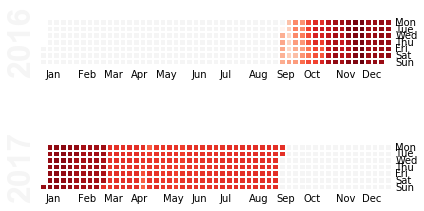

In [27]:
%matplotlib inline
import calmap
calmap.calendarplot(mean_avail)

/Users/collinreinking/anaconda3/lib/python3.5/site-packages/calmap/__init__.py:294: FutureWarning:

how in .resample() is deprecated
the new syntax is .resample(...).sum()

/Users/collinreinking/anaconda3/lib/python3.5/site-packages/calmap/__init__.py:146: MatplotlibDeprecationWarning:

The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.



(<matplotlib.figure.Figure at 0x128425780>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x12841a7b8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12abe4390>], dtype=object))

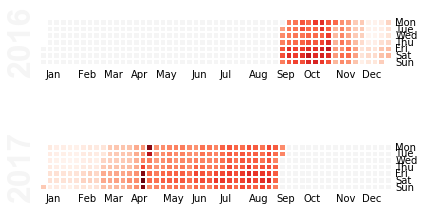

In [28]:
mean_filled_price = com_calendar.groupby('date').modeled_price.mean()
calmap.calendarplot(mean_filled_price)

/Users/collinreinking/anaconda3/lib/python3.5/site-packages/calmap/__init__.py:294: FutureWarning:

how in .resample() is deprecated
the new syntax is .resample(...).sum()

/Users/collinreinking/anaconda3/lib/python3.5/site-packages/calmap/__init__.py:146: MatplotlibDeprecationWarning:

The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.



(<matplotlib.figure.Figure at 0x12accdac8>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x12acc55c0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11cd36940>], dtype=object))

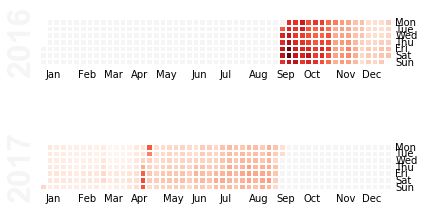

In [29]:
mean_price_available = com_calendar.groupby('date').price.mean()
calmap.calendarplot(mean_price_available)